# License
Copyright (C) 2019 Christoph G. Hoffmann. All rights reserved.

This file is part of mjoindices

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program.  If not, see <https://www.gnu.org/licenses/>.

Contact: christoph.hoffmann@uni-greifswald.de

# Before you start
This file evaluates the quality of the OMI reproduction, but does not start the recalculation itself.

To generate the reproduction data first, you have to:
* Execute the script examples/recalculate_original_omi.py. 
* Change path- and filesname in this file below according to the settings in examples/recalculate_original_omi.py.

# Preparation of the evaluation
## Imports

In [26]:
from pathlib import Path
import numpy as np
import os.path
import inspect
import matplotlib.pyplot as plt

import mjoindices.empirical_orthogonal_functions as eof
import mjoindices.evaluation_tools
import mjoindices.principal_components as pc
import mjoindices.tools as tools

## Settings.
Adjust the settings and filenames according to your system here.



### Inclusion of DOY 366

The treatment of leap years does not exactly fit the original implementation (and two options are actually available for the recalculation). Here you can choose to exclude DOY 366 from the evaluation, since the evaluation of a different implementation might be meaningless.

In [27]:
setting_exclude_doy_366 = True

### DOY for Details
Select DOY for which you wuld like to seee a detailed comparison of the EOFs (number between 1 and 366)
E.g., DOY 23 is among the best agreements and DOY 218 the worst agreement.

In [28]:
doy=23

### Period, for which the PC time series are plotted
Select the start and end date.

In [29]:
pc_plot_period_start=np.datetime64("2011-01-01")
pc_plot_period_stop=np.datetime64("2011-12-31")


### External input files
**Original OLR data**: Download the data file from ftp://ftp.cdc.noaa.gov/Datasets/interp_OLR/olr.day.mean.nc to your local file system and adjust the local path below.

In [30]:
olr_data_filename = Path(os.path.abspath('')).parents[0] / "tests" / "testdata" / "olr.day.mean.nc"

**Original EOF functions**: The following directory should contain the two subdirectories "eof1" and "eof2", which should contain the files downloaded from ftp://ftp.cdc.noaa.gov/Datasets.other/MJO/eof1/ and ftp://ftp.cdc.noaa.gov/Datasets.other/MJO/eof2/, respectively.

In [31]:
originalOMIDataDirname = Path(os.path.abspath('')).parents[0] / "tests" / "testdata" / "OriginalOMI"

**Original OMI PC values**: Download the original OMI values from https://www.esrl.noaa.gov/psd/mjo/mjoindex/omi.1x.txt to your local file system and adjust the local path below.

In [32]:
originalOMIPCFile = Path(os.path.abspath('')).parents[0] / "tests" / "testdata" / "OriginalOMI" / "omi.1x.txt"

### Internal input files

**Original exlained variance values**: The following file is included in the package. Do not change the path.

In [33]:
original_omi_explained_variance_file = Path(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))).parents[0] / "tests" / "testdata" / "OriginalOMI" / "omi_var.txt"

### Recalculation input files
The following two files files will be generated by the example recalculate_original_omi.py included in this package (runs for up to two hours on common PCs).

**The recalculated EOF values**:

In [34]:
eofnpzfile = Path(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))) / "example_data" / "EOFs.npz"

**The recalculated PC values**:

In [35]:
pctxtfile = Path(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))) / "example_data" / "PCs.txt"

### Output directory

**The Directory in which the figures are saved**:

In [36]:
fig_dir = Path(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))) / "example_data" / "omi_reproduction_evaluation_plots"

if not fig_dir.exists():
    fig_dir.mkdir(parents=True, exist_ok=False)

## Evaluation

There should be no need to change anything below.

### Evaluation of the EOFs

Load EOF data (recalculation and reference):

In [37]:
eofs = eof.restore_all_eofs_from_npzfile(eofnpzfile)
orig_eofs = eof.load_all_original_eofs_from_directory(originalOMIDataDirname)

Check the **correlations** between the EOFs for each DOY individually:

########## Summary of EOF comparison for all DOYs (EOF 1)
Worst Correlation (at DOY 218): 0.9950
Worst 99% percentile (at DOY 218): 0.0083
Worst 68% percentile (at DOY 75): 0.0017
########## Summary of EOF comparison for all DOYs (EOF 2)
Worst Correlation (at DOY 218): 0.9942
Worst 99% percentile (at DOY 75): 0.0064
Worst 68% percentile (at DOY 218): 0.0017


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


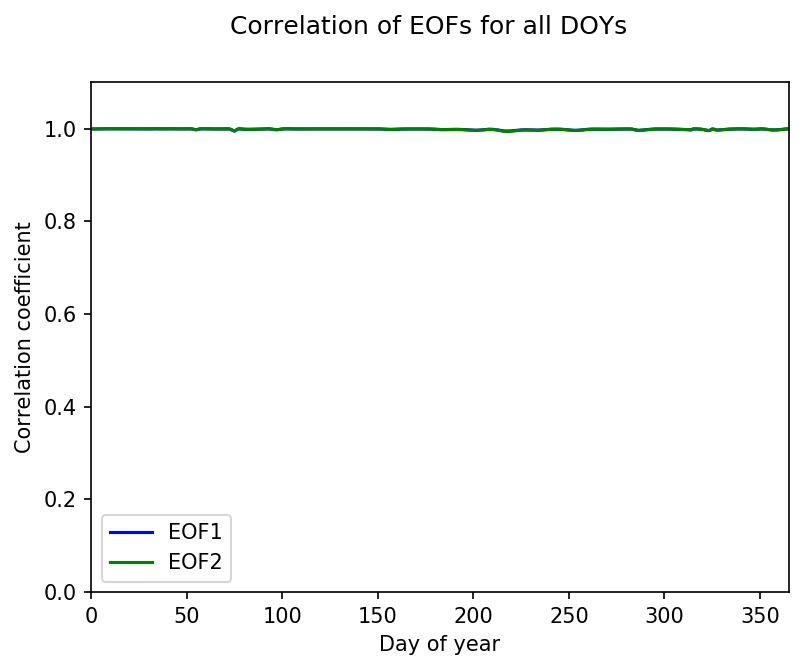

In [38]:
fig = mjoindices.evaluation_tools.plot_correlation_for_eofs_all_doys(eofs, orig_eofs, exclude_doy366=setting_exclude_doy_366, do_print=True)
fig.show()
fig.savefig(fig_dir / "EOFCorrelations.png")
fig.savefig(fig_dir / "EOFCorrelations.pdf")

Show more **detailed statistics** describing the agreement of the EOFs for each DOY

########## Summary of EOF comparison for all DOYs (EOF 1)
Worst Correlation (at DOY 218): 0.9950
Worst 99% percentile (at DOY 218): 0.0083
Worst 68% percentile (at DOY 75): 0.0017
########## Summary of EOF comparison for all DOYs (EOF 2)
Worst Correlation (at DOY 218): 0.9942
Worst 99% percentile (at DOY 75): 0.0064
Worst 68% percentile (at DOY 218): 0.0017


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


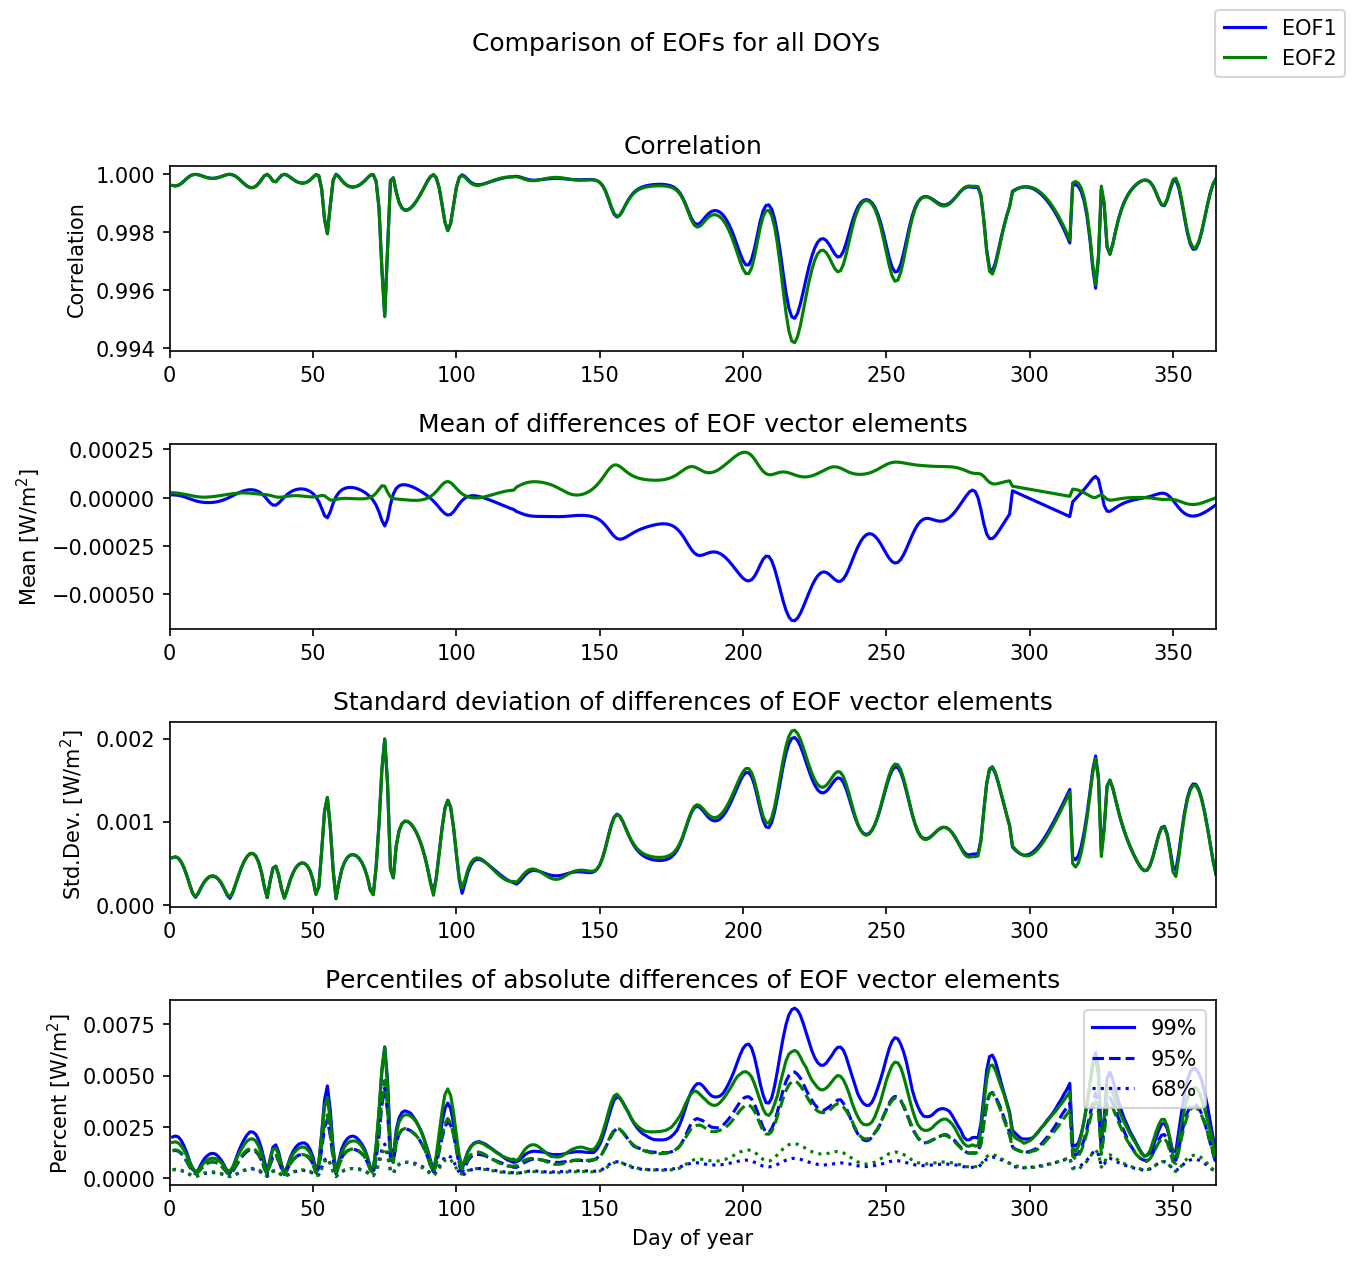

In [39]:
fig = mjoindices.evaluation_tools.plot_comparison_stats_for_eofs_all_doys(eofs, orig_eofs, exclude_doy366=setting_exclude_doy_366, do_print=True)
fig.show()
fig.savefig(fig_dir / "EOFComparisonStatistics.png")
fig.savefig(fig_dir / "EOFComparisonStatistics.pdf")

Show the **explained variances** of the recalculation.

/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


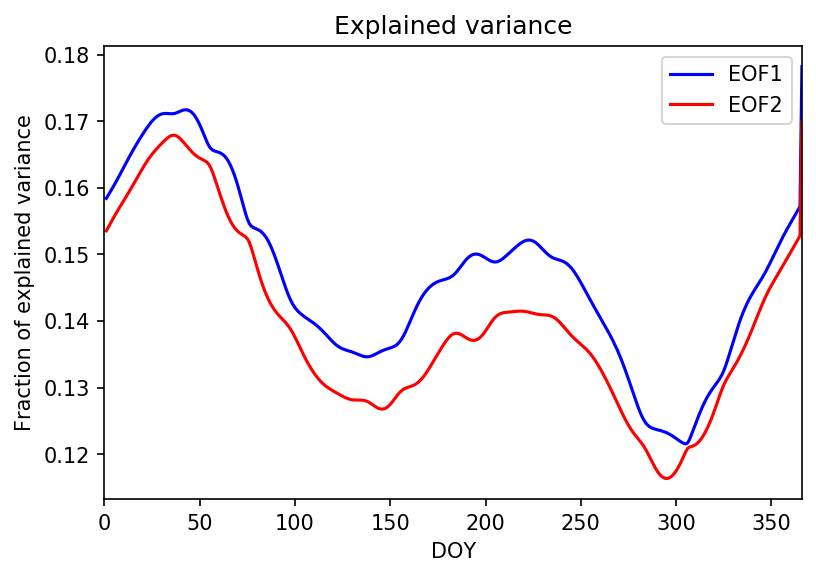

In [40]:
fig = eof.plot_explained_variance_for_all_doys(eofs, include_no_observations=False)
fig.show()
fig.savefig(fig_dir / "ExplainedVarianceForAllDoys.png")
fig.savefig(fig_dir / "ExplainedVarianceForAllDoys.pdf")

Compare the **explained variances for EOF1** to the original ones for each DOY

##########
Explained Variance for EOF1
###### DOY 366 excluded
##########
Explained Variance for EOF1
CorrelationCoefficient: 0.9991
Mean of difference: -0.0001
Stddev. of difference: 0.0006
68% Percentile (abs. value of differences: 0.0006
95% Percentile (abs. value of differences: 0.0011
99% Percentile (abs. value of differences: 0.0012


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


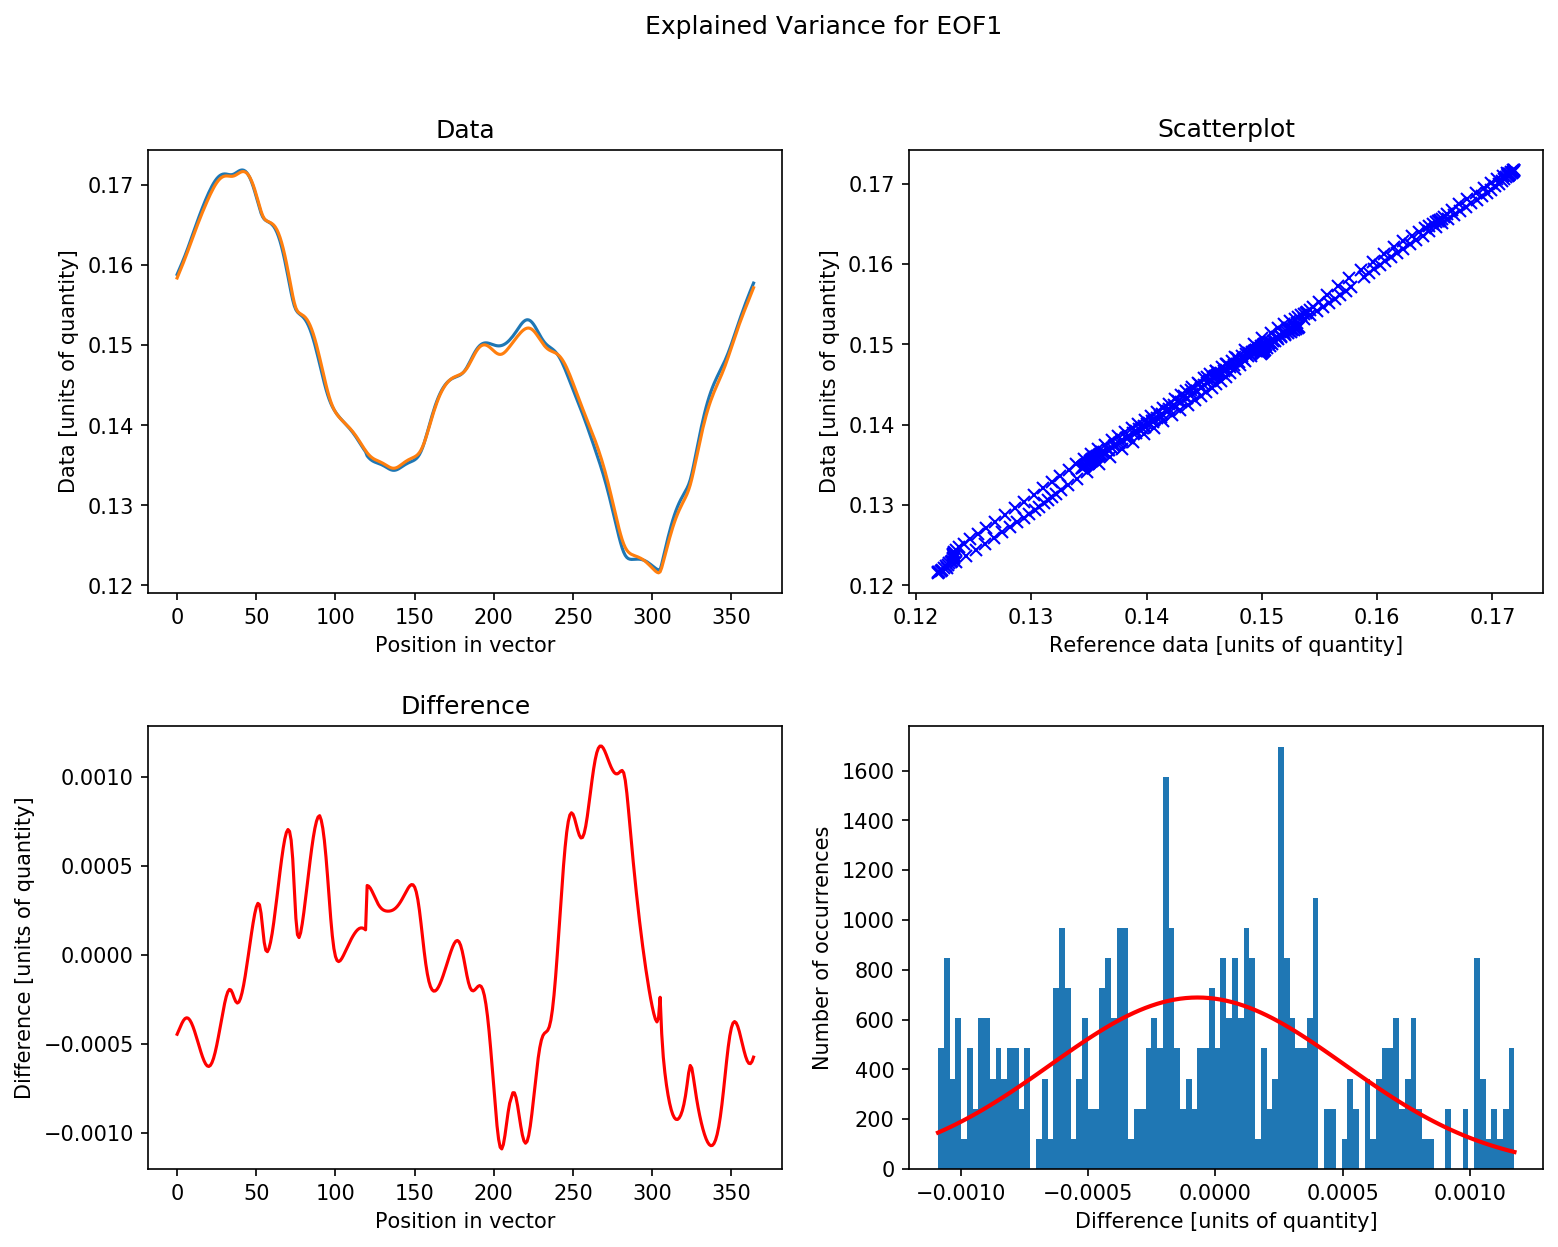

In [41]:
orig_explained_variance_1, orig_explained_variance_2 = mjoindices.evaluation_tools.load_omi_explained_variance(original_omi_explained_variance_file)
fig = mjoindices.evaluation_tools.plot_comparison_stats_for_explained_variance(orig_explained_variance_1, eofs.explained_variance1_for_all_doys(), title="Explained Variance for EOF1", do_print=True, exclude_doy366=setting_exclude_doy_366)
fig.show()
fig.savefig(fig_dir / "ExplainedVarianceComparison_EOF1.png")
fig.savefig(fig_dir / "ExplainedVarianceComparison_EOF1.pdf")

Compare the **explained variances for EOF2** to the original ones for each DOY

##########
Explained Variance for EOF2
###### DOY 366 excluded
##########
Explained Variance for EOF2
CorrelationCoefficient: 0.9993
Mean of difference: -0.0001
Stddev. of difference: 0.0005
68% Percentile (abs. value of differences: 0.0006
95% Percentile (abs. value of differences: 0.0010
99% Percentile (abs. value of differences: 0.0013


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


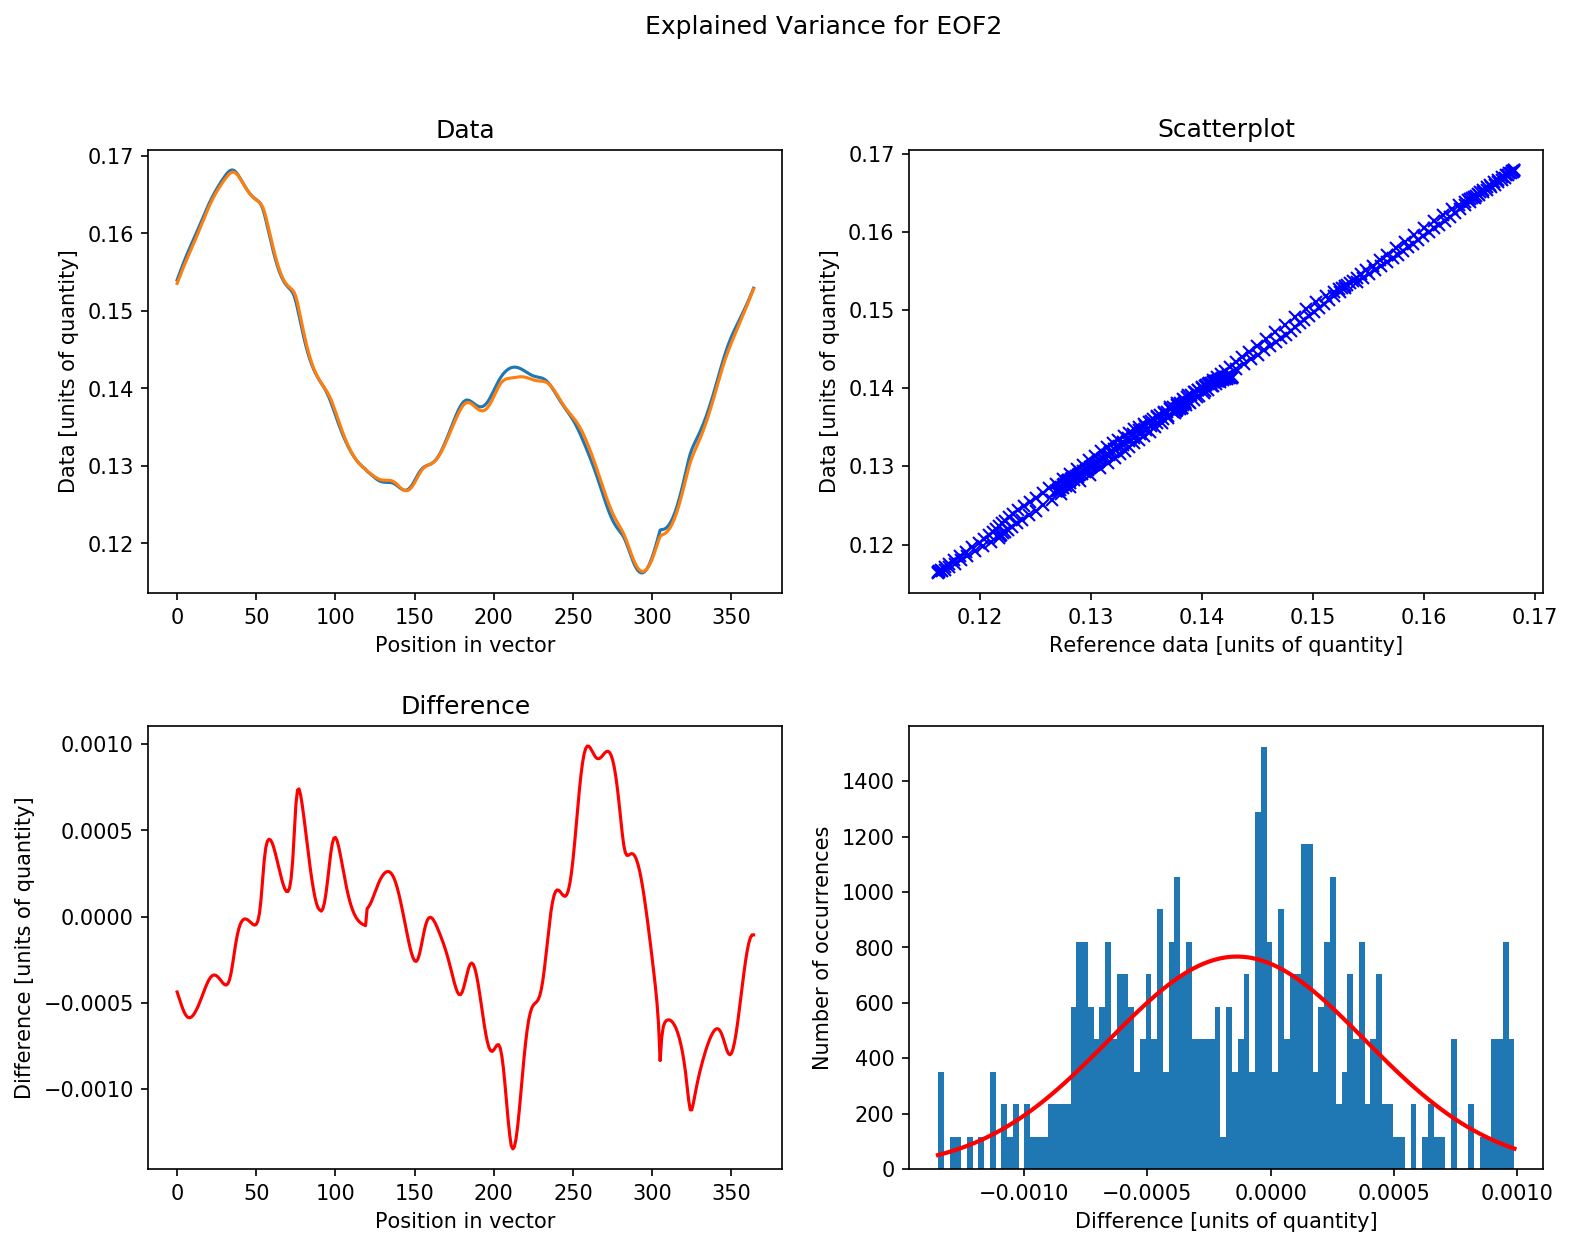

In [42]:
orig_explained_variance_1, orig_explained_variance_2 = mjoindices.evaluation_tools.load_omi_explained_variance(original_omi_explained_variance_file)
fig = mjoindices.evaluation_tools.plot_comparison_stats_for_explained_variance(orig_explained_variance_2, eofs.explained_variance2_for_all_doys(), title="Explained Variance for EOF2", do_print=True, exclude_doy366=setting_exclude_doy_366)
fig.show()
fig.savefig(fig_dir / "ExplainedVarianceComparison_EOF2.png")
fig.savefig(fig_dir / "ExplainedVarianceComparison_EOF2.pdf")

Show a **detailed comparison of individual EOFs** for the particular DOY selected above

*EOF Maps:*

/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


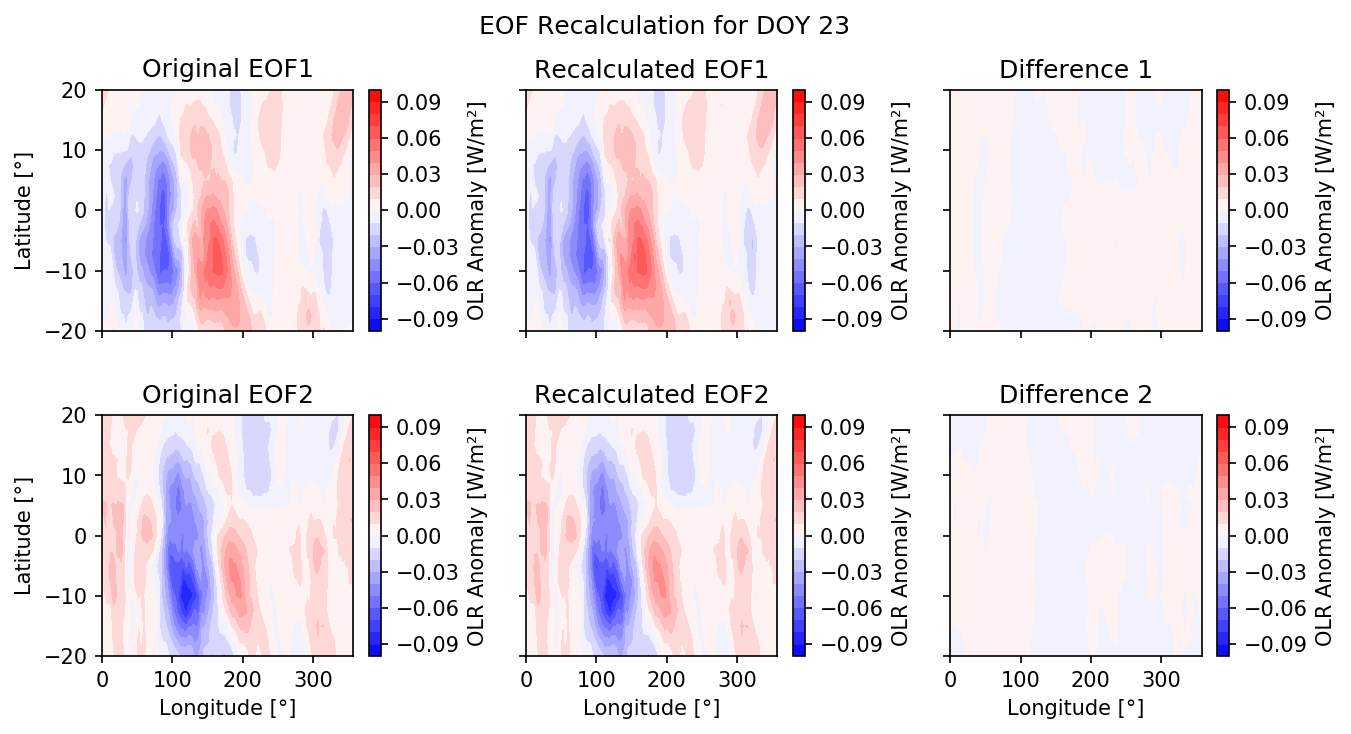

In [43]:
fig = mjoindices.evaluation_tools.plot_individual_eof_map_comparison(orig_eofs.eofdata_for_doy(doy), eofs.eofdata_for_doy(doy), doy=doy)
fig.show()
fig.savefig(fig_dir / ("EOFComparisonMapDOY%i.png"%doy))
fig.savefig(fig_dir / ("EOFComparisonMapDOY%i.pdf"%doy))

*EOF1*:

##########
EOF1 for DOY 23
CorrelationCoefficient: 0.9999
Mean of difference: 0.0000
Stddev. of difference: 0.0002
68% Percentile (abs. value of differences: 0.0002
95% Percentile (abs. value of differences: 0.0006
99% Percentile (abs. value of differences: 0.0009


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


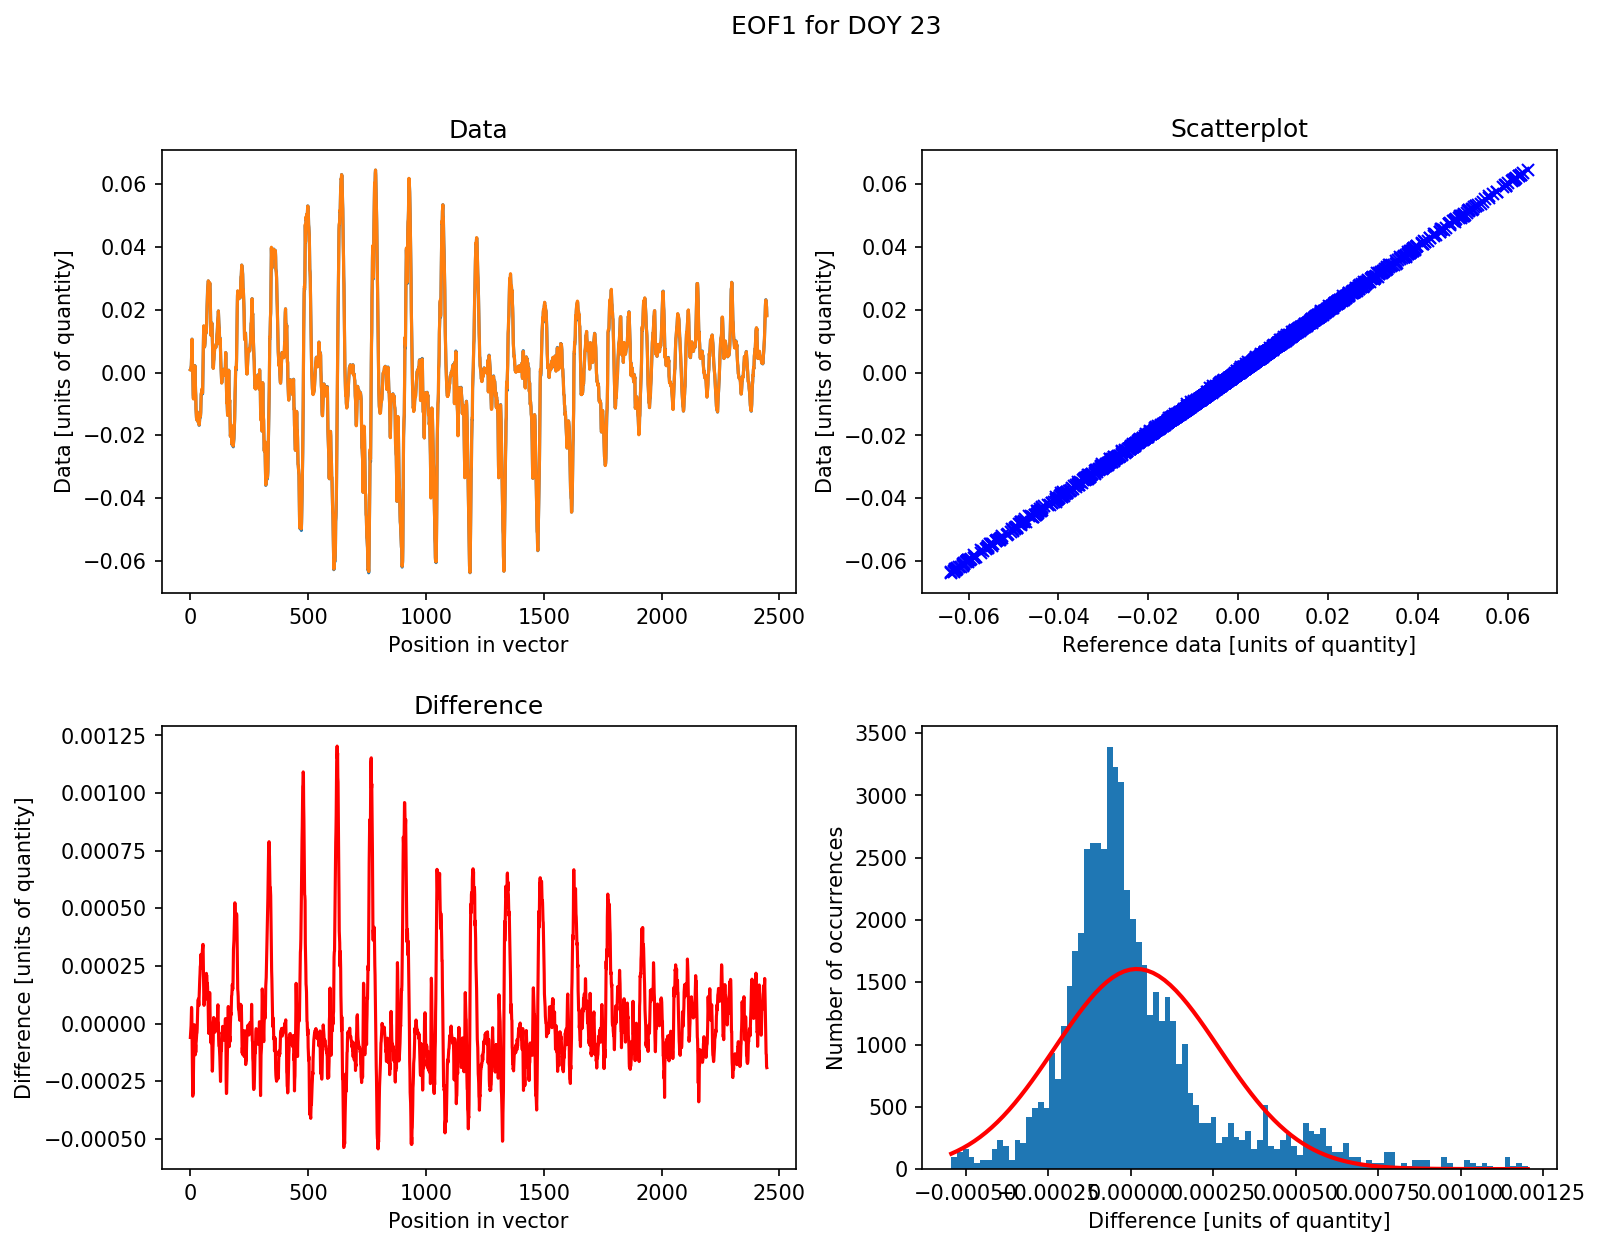

In [44]:
fig = mjoindices.evaluation_tools.plot_vector_agreement(orig_eofs.eof1vector_for_doy(doy), eofs.eof1vector_for_doy(doy), title="EOF1 for DOY %i" % doy, do_print=True)
fig.show()
fig.savefig(fig_dir / ("EOF1DetailedComparisonDOY%i.png"%doy))
fig.savefig(fig_dir / ("EOF1DetailedComparisonDOY%i.pdf"%doy))

*EOF2*:

##########
EOF2 for DOY 23
CorrelationCoefficient: 0.9999
Mean of difference: 0.0000
Stddev. of difference: 0.0003
68% Percentile (abs. value of differences: 0.0002
95% Percentile (abs. value of differences: 0.0006
99% Percentile (abs. value of differences: 0.0008


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


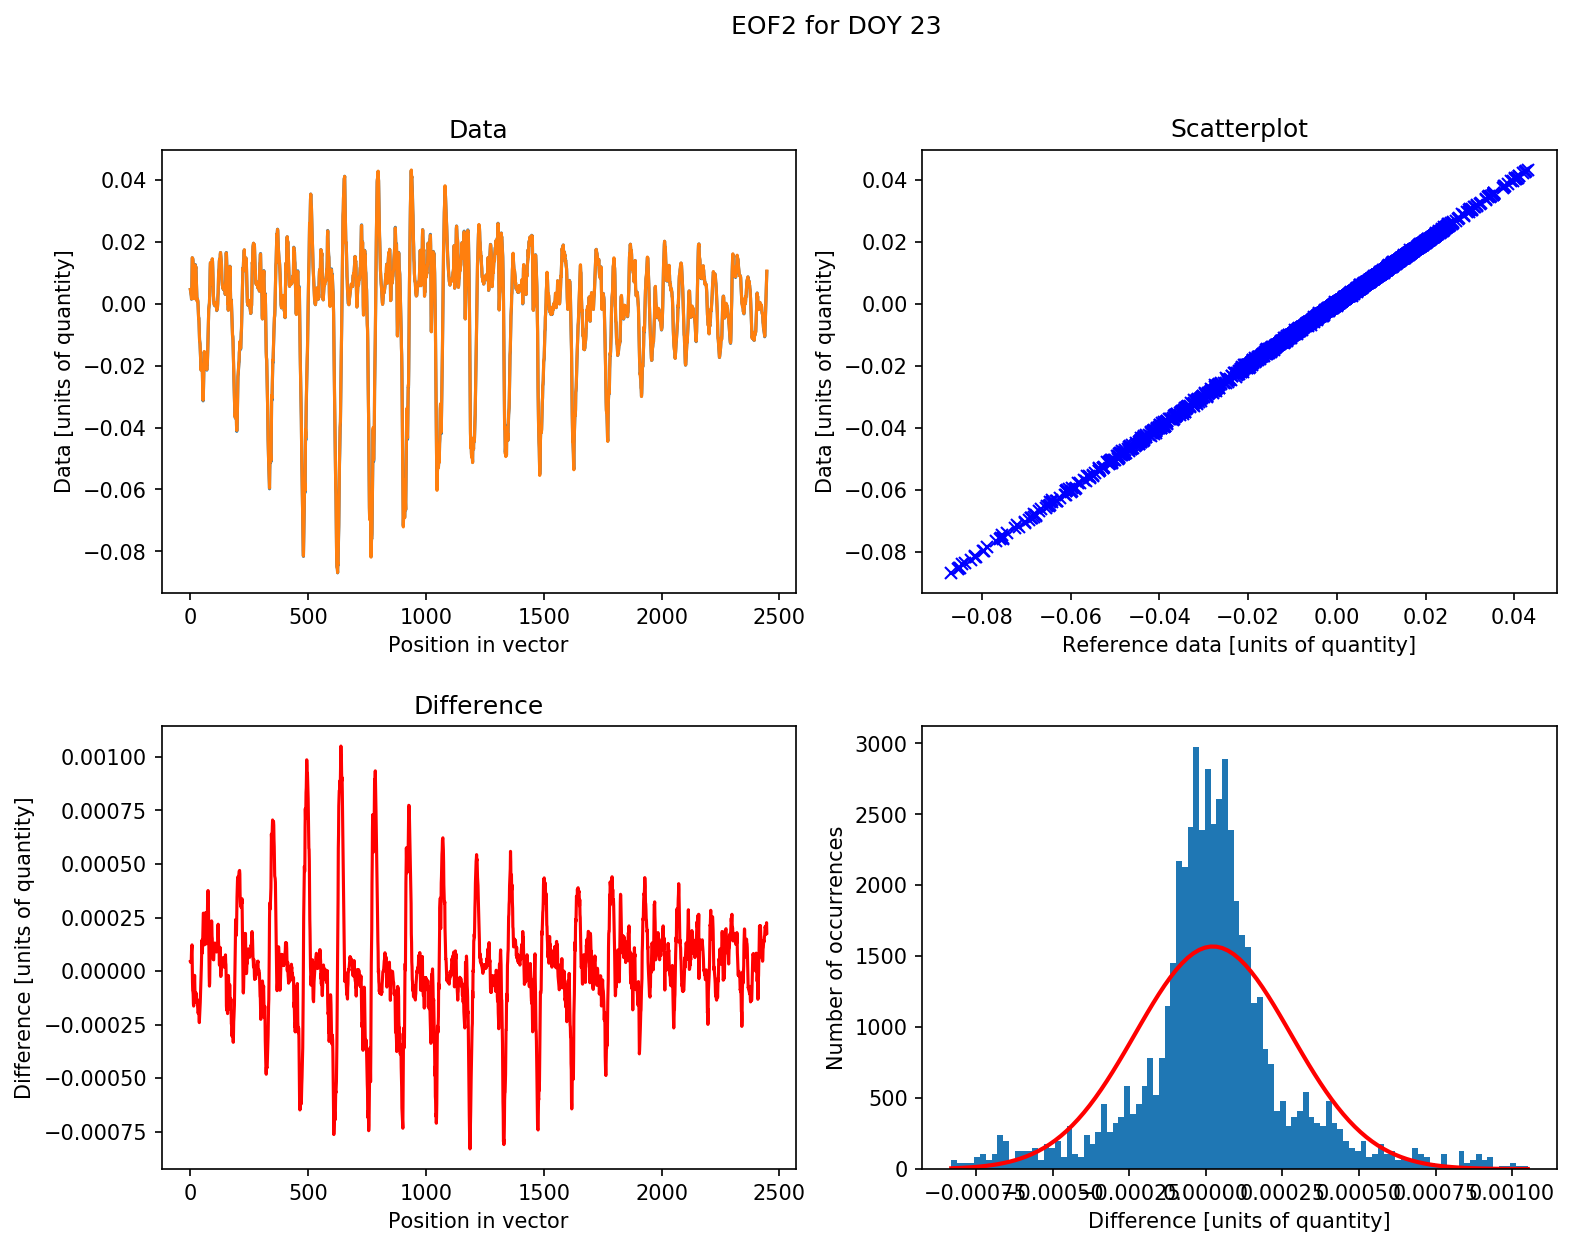

In [45]:
fig = mjoindices.evaluation_tools.plot_vector_agreement(orig_eofs.eof2vector_for_doy(doy), eofs.eof2vector_for_doy(doy), title="EOF2 for DOY %i" % doy, do_print=True)
fig.show()
fig.savefig(fig_dir / ("EOF2DetailedComparisonDOY%i.png"%doy))
fig.savefig(fig_dir / ("EOF2DetailedComparisonDOY%i.pdf"%doy))

### Evaluation of the PCs

Load PC data (recalculation and reference):

In [46]:
pcs = pc.load_pcs_from_txt_file(pctxtfile)
orig_pcs = pc.load_original_pcs_from_txt_file(originalOMIPCFile)

Plot **sample period** of the PC time series

/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


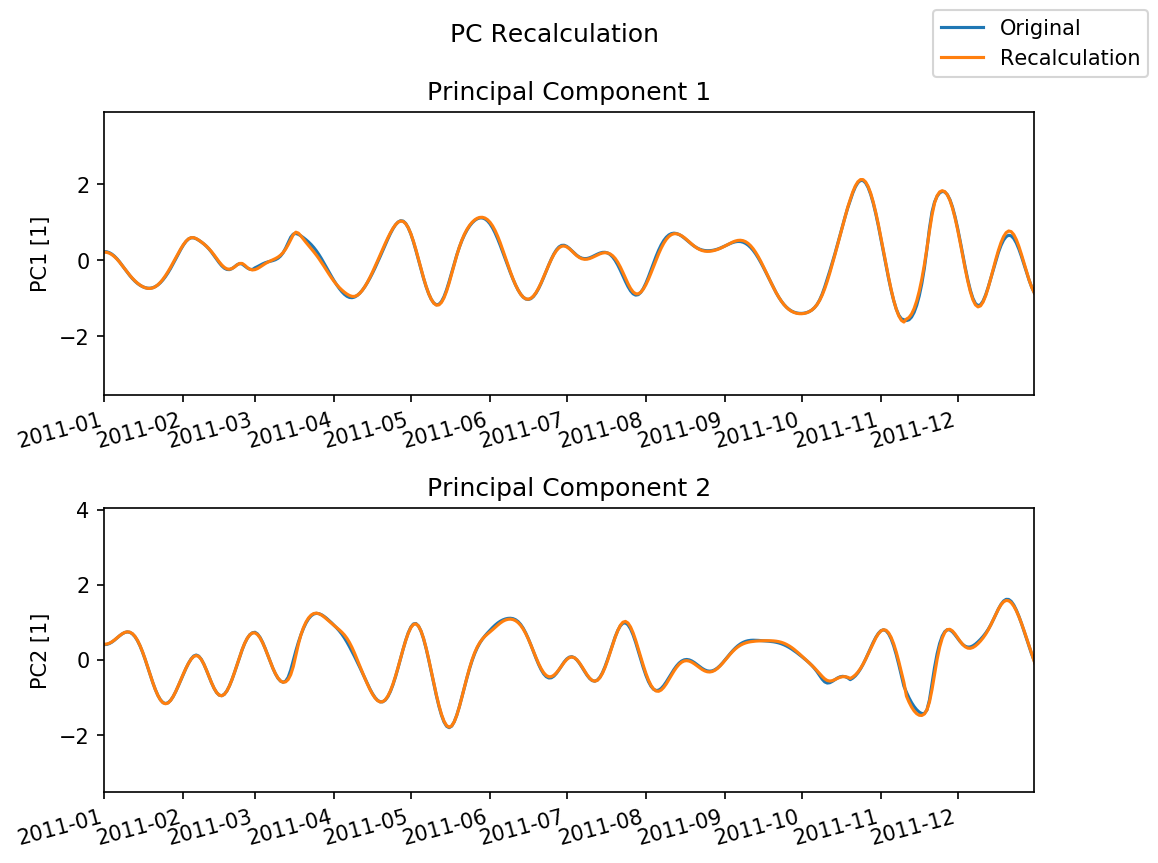

In [47]:
fig = mjoindices.evaluation_tools.plot_comparison_orig_calc_pcs(pcs, orig_pcs, start_date=pc_plot_period_start, end_date=pc_plot_period_stop)
fig.show()
fig.savefig(fig_dir / "PCTimeSeriesSample.png")
fig.savefig(fig_dir / "PCTimeSeriesSample.pdf")

Plot a detailed evaluation of the **PC1 agreement**

##########
PC1
##### Complete time series
CorrelationCoefficient: 0.9987
Mean of difference: -0.0001
Stddev. of difference: 0.0508
68% Percentile (abs. value of differences: 0.0318
95% Percentile (abs. value of differences: 0.0968
99% Percentile (abs. value of differences: 0.1551
###### DOY 366 excluded
CorrelationCoefficient: 0.9990
Mean of difference: -0.0002
Stddev. of difference: 0.0448
68% Percentile (abs. value of differences: 0.0318
95% Percentile (abs. value of differences: 0.0964
99% Percentile (abs. value of differences: 0.1522


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


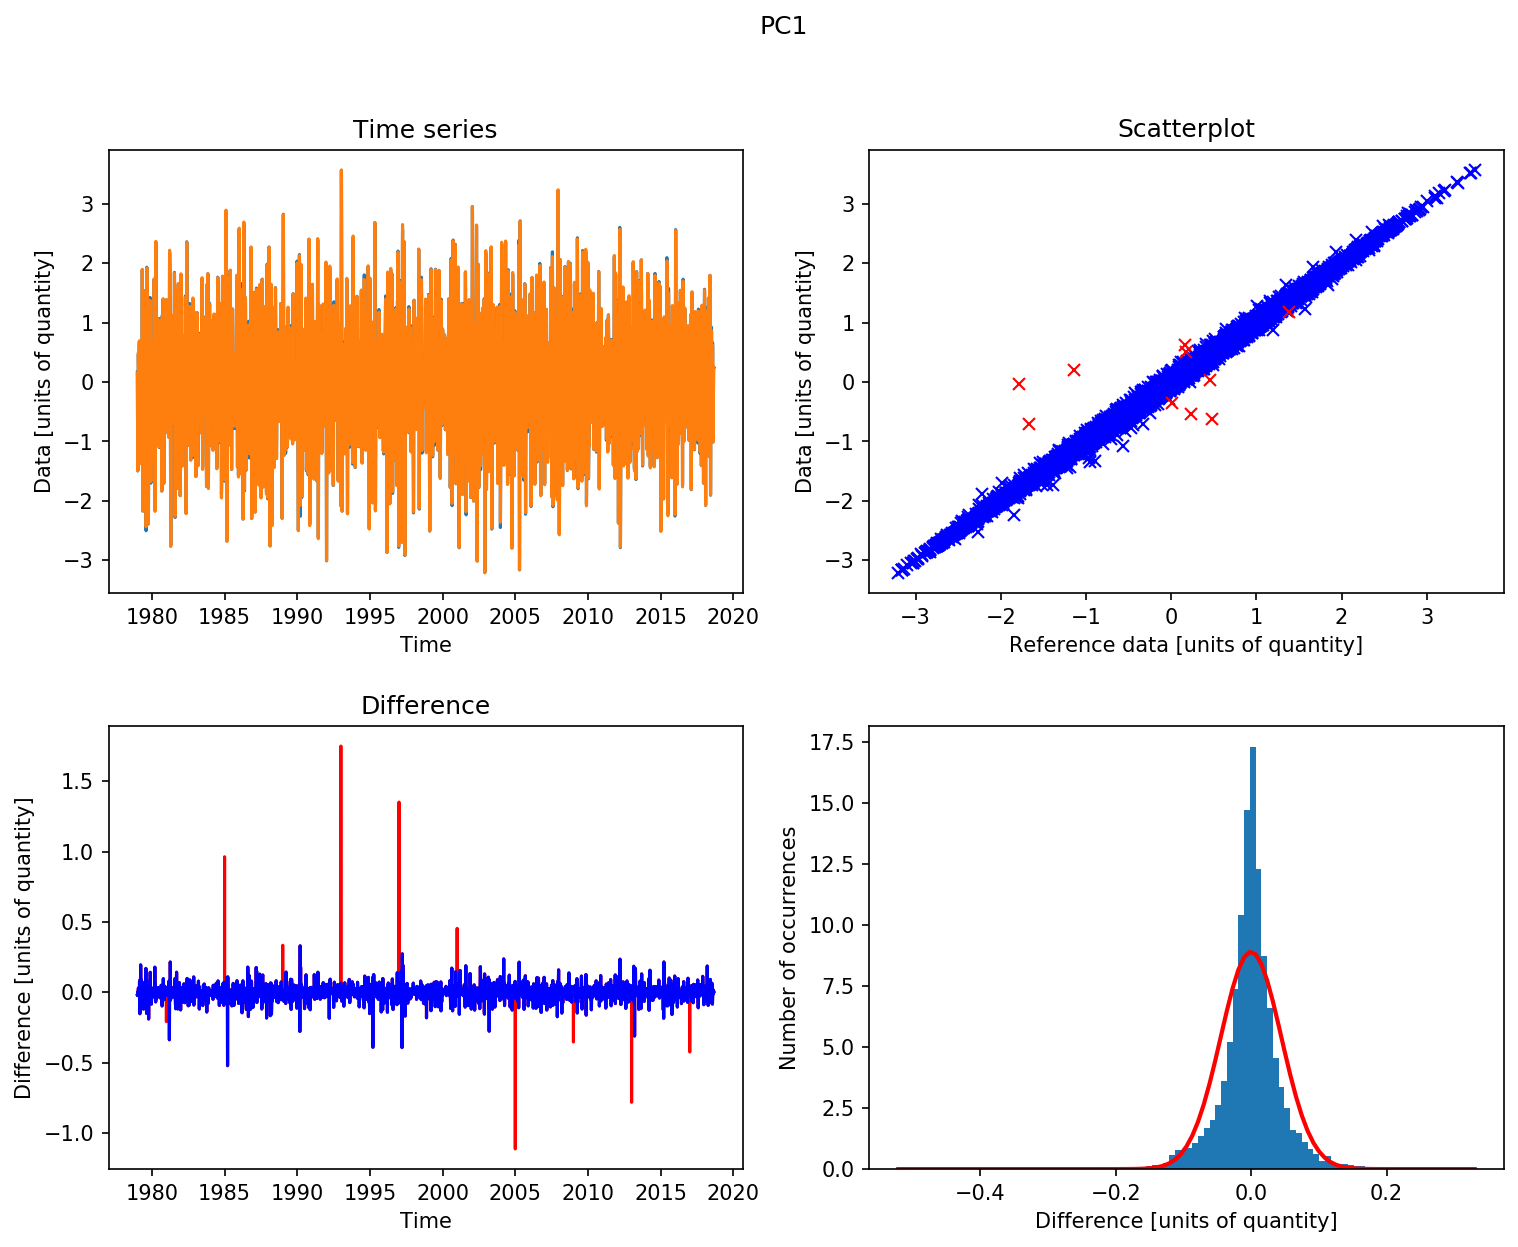

In [48]:
fig = mjoindices.evaluation_tools.plot_timeseries_agreement(orig_pcs.pc1, orig_pcs.time, pcs.pc1, pcs.time, title="PC1", do_print=True)
fig.show()
fig.savefig(fig_dir / "PC1_Comparison.png")
fig.savefig(fig_dir / "PC1_Comparison.pdf")

Plot a detailed evaluation of the **PC2 agreement**

##########
PC2
##### Complete time series
CorrelationCoefficient: 0.9985
Mean of difference: -0.0001
Stddev. of difference: 0.0500
68% Percentile (abs. value of differences: 0.0350
95% Percentile (abs. value of differences: 0.1032
99% Percentile (abs. value of differences: 0.1707
###### DOY 366 excluded
CorrelationCoefficient: 0.9986
Mean of difference: -0.0001
Stddev. of difference: 0.0483
68% Percentile (abs. value of differences: 0.0349
95% Percentile (abs. value of differences: 0.1028
99% Percentile (abs. value of differences: 0.1670


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


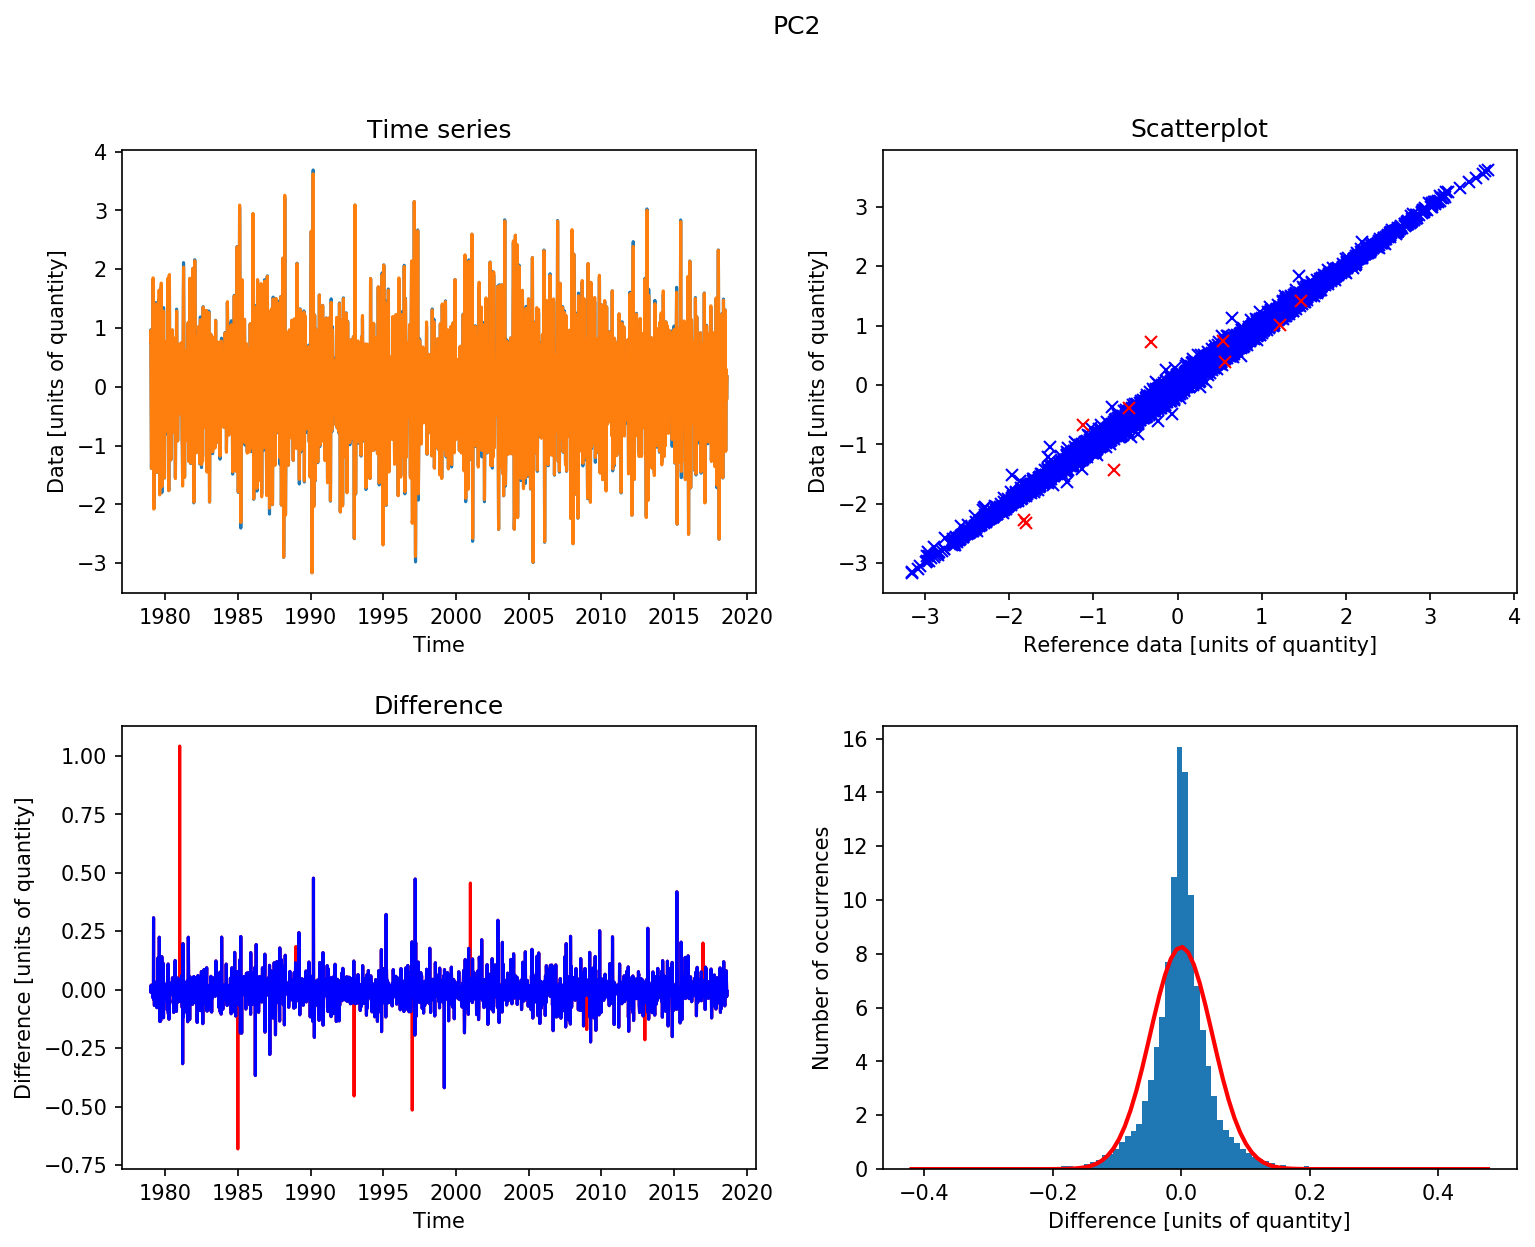

In [49]:
fig = mjoindices.evaluation_tools.plot_timeseries_agreement(orig_pcs.pc2, orig_pcs.time, pcs.pc2, pcs.time, title="PC2", do_print=True)
fig.show()
fig.savefig(fig_dir / "PC2_Comparison.png")
fig.savefig(fig_dir / "PC2_Comparison.pdf")

Calculate and plot a detailed evaluation of the **resulting MJO strength**

##########
MJO Strength
##### Complete time series
CorrelationCoefficient: 0.9998
Mean of difference: -0.0001
Stddev. of difference: 0.0112
68% Percentile (abs. value of differences: 0.0080
95% Percentile (abs. value of differences: 0.0227
99% Percentile (abs. value of differences: 0.0356
###### DOY 366 excluded
CorrelationCoefficient: 0.9999
Mean of difference: -0.0000
Stddev. of difference: 0.0104
68% Percentile (abs. value of differences: 0.0080
95% Percentile (abs. value of differences: 0.0226
99% Percentile (abs. value of differences: 0.0349


/home/ch/mjoindices/venv_dist_test/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


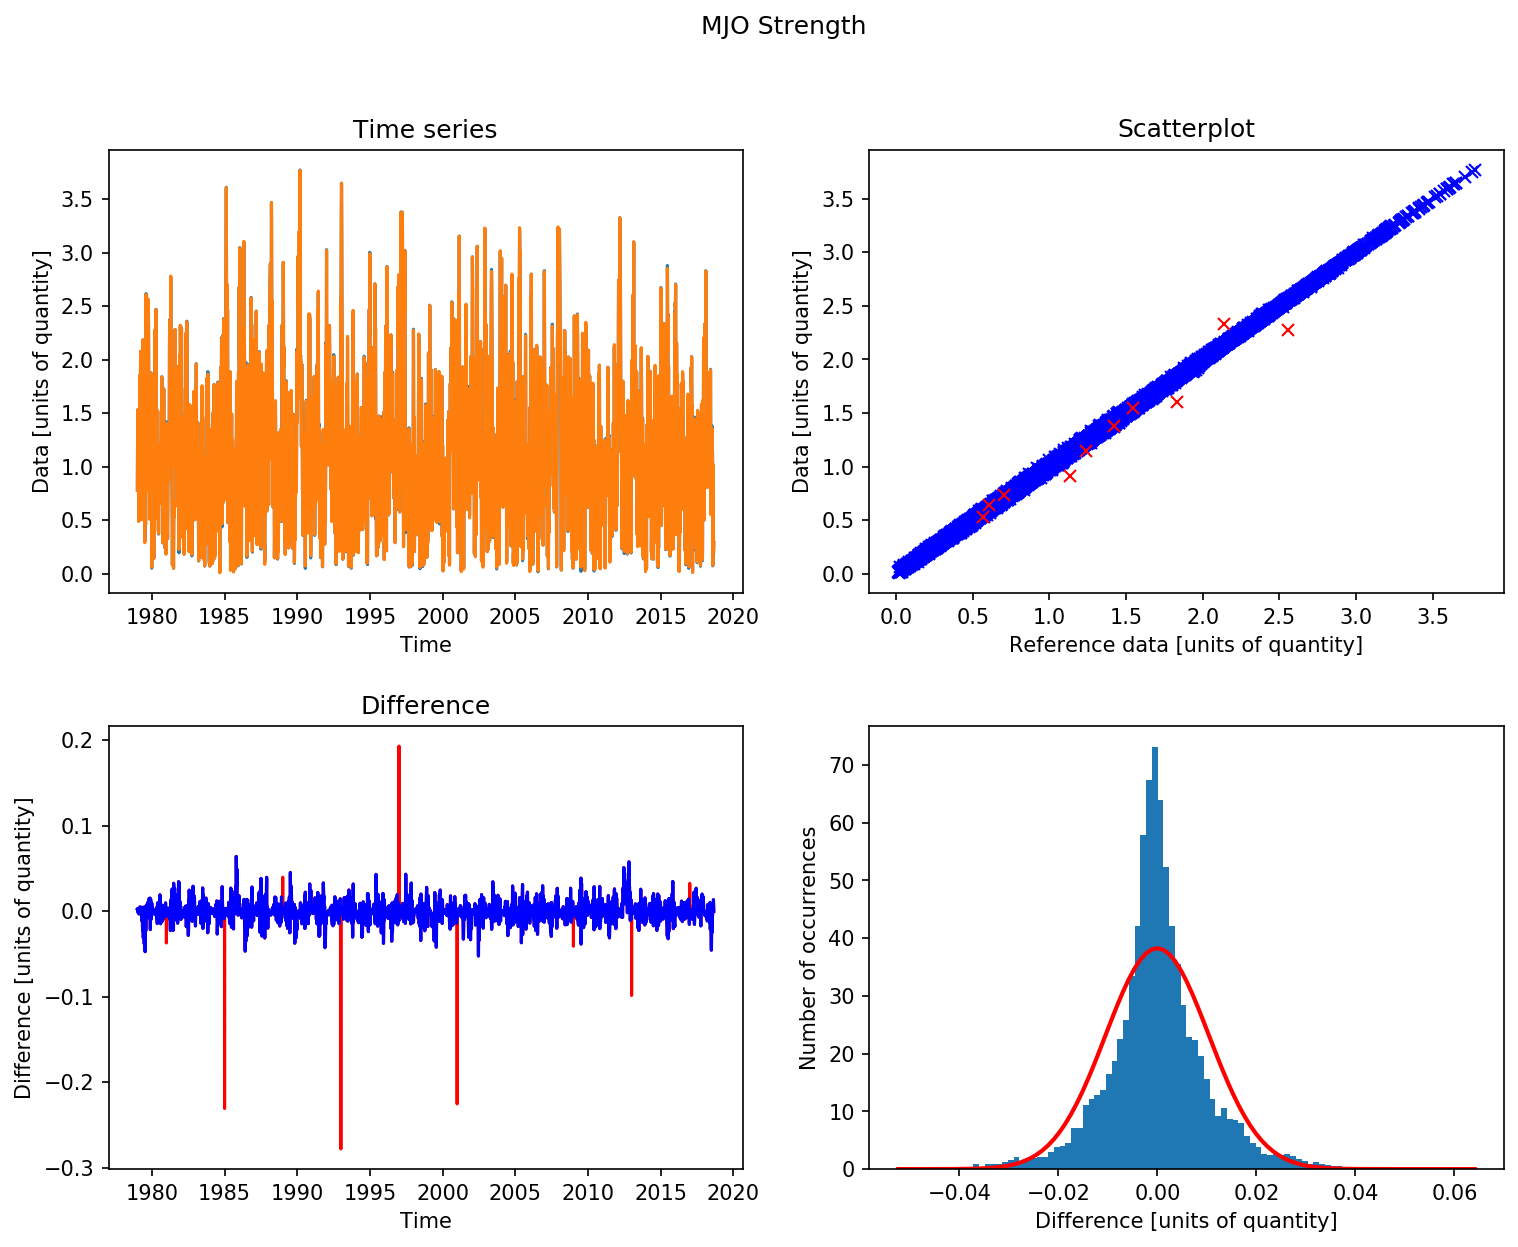

In [50]:
strength = np.sqrt(np.square(pcs.pc1) + np.square(pcs.pc2))
orig_strength = np.sqrt(np.square(orig_pcs.pc1) + np.square(orig_pcs.pc2))
fig = mjoindices.evaluation_tools.plot_timeseries_agreement(orig_strength, orig_pcs.time, strength, pcs.time, title="MJO Strength", do_print=True)
fig.show()
fig.savefig(fig_dir / "MJOStrength_Comparison.png")
fig.savefig(fig_dir / "MJOStrength_Comparison.pdf")




